# [Deprecated] tf.keras.preprocessing.image

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image

**Deprecated**: tf.keras.preprocessing.image APIs do not operate on tensors and are not recommended for new code. Prefer loading data with tf.keras.utils.**image_dataset_from_directory**, and then transforming the output **tf.data.Dataset** with **preprocessing layers**. For more information, see the tutorials for loading images and augmenting images, as well as the preprocessing layer guide.

## Step 48

# tf.keras.utils.image_dataset_from_directory


https://www.tensorflow.org/tutorials/load_data/images

This tutorial shows how to load and preprocess an image dataset in three ways:

* First, you will use high-level Keras preprocessing utilities (such as tf.keras.utils.image_dataset_from_directory) and layers (such as tf.keras.layers.Rescaling) to read a directory of images on disk.
* Next, you will write your own input pipeline from scratch using tf.data.
* Finally, you will download a dataset from the large catalog available in TensorFlow Datasets.

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

## Load and preprocess images

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


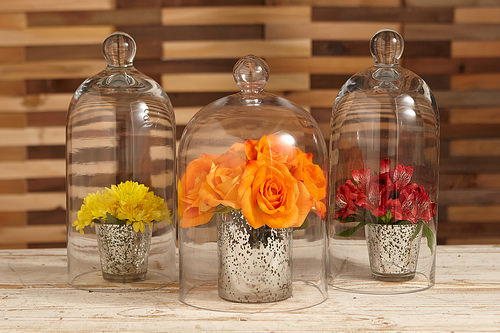

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
type(roses[0])

pathlib.PosixPath

In [ ]:
image = PIL.Image.open(str(roses[0]))
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
image.info

{'jfif': 257,
 'jfif_version': (1, 1),
 'dpi': (300, 300),
 'jfif_unit': 1,
 'jfif_density': (300, 300),
 'comment': b'cmp3.10.3.1Lq3 0x1829d7c3\x00',
 'icc_profile': b'\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\

In [ ]:
image.size

(500, 333)

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Generates a tf.data.Dataset from image files in a directory.

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
!ls /root/.keras/datasets/flower_photos/roses

10090824183_d02c613f10_m.jpg  3494252600_29f26e3ff0_n.jpg
102501987_3cdb8e5394_n.jpg    3500121696_5b6a69effb_n.jpg
10503217854_e66a804309.jpg    3526860692_4c551191b1_m.jpg
10894627425_ec76bbc757_n.jpg  353897245_5453f35a8e.jpg
110472418_87b6a3aa98_m.jpg    3550491463_3eb092054c_m.jpg
11102341464_508d558dfc_n.jpg  3554620445_082dd0bec4_n.jpg
11233672494_d8bf0a3dbf_n.jpg  3556123230_936bf084a5_n.jpg
11694025703_9a906fedc1_n.jpg  3560426426_1c66cb8330.jpg
118974357_0faa23cce9_n.jpg    3576488381_611f3446e0_n.jpg
11944957684_2cc806276e.jpg    3621011057_0d03bd171b_n.jpg
12045735155_42547ce4e9_n.jpg  3624546109_8eb98f0cdb.jpg
12165480946_c4a3fe182d_n.jpg  3630246240_4fee9a33db.jpg
12202373204_34fb07205b.jpg    3634244527_e72c47842c_n.jpg
12238827553_cf427bfd51_n.jpg  3654988152_b11178bbcb.jpg
12240165555_98625b1e88_n.jpg  3655527028_0fab2b547d_n.jpg
12240303_80d87f77a3_n.jpg     3661675690_ed2d05fa5f_n.jpg
12240577184_b0de0e53ea_n.jpg  3663244576_97f595cf4a.jpg
12243068283_ee4c2683e2_n.jp

In [ ]:
type(train_ds)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


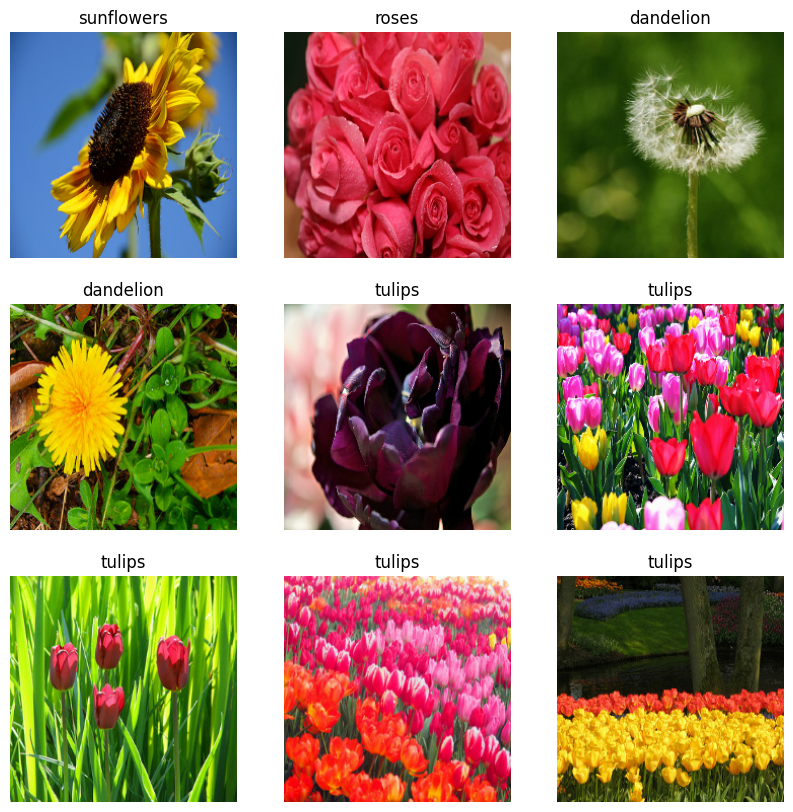

In [ ]:
import matplotlib.pyplot as plt

def show_images(train_ds):
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

show_images(train_ds)

In [ ]:

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  input_shape = image_batch.get_shape().as_list()[1:]
  break

(32, 224, 224, 3)
(32,)


In [ ]:
input_shape

[224, 224, 3]

# [Deprecated] tf.keras.preprocessing.image.ImageDataGenerator

**Deprecated**: tf.keras.preprocessing.image.ImageDataGenerator is not recommended for new code. Prefer loading images with tf.keras.utils.**image_dataset_from_directory** and transforming the output tf.data.Dataset with preprocessing layers. For more information, see the tutorials for loading images and augmenting images, as well as the **preprocessing layer** guide.

## Step 49

## Step 50

## Working with preprocessing layers



https://www.tensorflow.org/guide/keras/preprocessing_layers

The Keras preprocessing layers API allows developers to build Keras-native input processing pipelines. These input processing pipelines can be used as independent preprocessing code in non-Keras workflows, combined directly with Keras models, and exported as part of a Keras SavedModel.


> Image preprocessing

These layers are for standardizing the inputs of an image model.

* tf.keras.layers.Resizing: resizes a batch of images to a target size.
* tf.keras.layers.Rescaling: rescales and offsets the values of a batch of image (e.g. go from inputs in the [0, 255] range to inputs in the [0, 1] range.
* tf.keras.layers.CenterCrop: returns a center crop of a batch of images.

> Numerical features preprocessing

* tf.keras.layers.Normalization: performs feature-wise normalize of input features.
* tf.keras.layers.Discretization: turns continuous numerical features into integer categorical features.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

data = np.array([[0.1, 0.2, 0.3], [0.8, 0.9, 1.0], [1.5, 1.6, 1.7],])
layer = layers.Normalization()
layer.adapt(data)
normalized_data = layer(data)

print("Features mean: {:.2f}".format(normalized_data.numpy().mean()))
print("Features std: {:.2f}".format(normalized_data.numpy().std()))

2023-05-10 07:05:04.282741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 07:05:04.406633: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-10 07:05:05.877742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-10 07:05:05.982924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] suc

Features mean: -0.00
Features std: 1.00


In [ ]:
std_data = (data - tf.reduce_mean(data))/tf.math.reduce_std(data)
print("Features mean: {:.2f}".format(tf.reduce_mean(std_data)))
print("Features std: {:.2f}".format(tf.math.reduce_std(std_data)))

Features mean: 0.00
Features std: 1.00


### Preprocessing data before the model 

In [ ]:
# Load some data
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
input_shape = x_train.shape[1:]
classes = 10
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

* apply it to your tf.data.Dataset, so as to obtain a dataset that yields batches of preprocessed data, like this:


In [ ]:
preprocessing_layer = layers.Normalization()
preprocessing_layer.adapt(x_train)

images = train_dataset\
  .batch(16)\
  .map(lambda x, y: (preprocessing_layer(x), y))\
  .prefetch(tf.data.AUTOTUNE)\
  .take(1)

for img, label in images:
  print(type(img[0]), len(img), type(label))
  print("Features mean: {:.2f}".format(tf.reduce_mean(img)))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
<class 'tensorflow.python.framework.ops.EagerTensor'> 16 <class 'tensorflow.python.framework.ops.EagerTensor'>
Features mean: -0.17



### Make them part of the model, like this:

* When all data preprocessing is part of the model, other people can load and use your model without having to be aware of how each feature is expected to be encoded & normalized. Your inference model will be able to process raw images or raw structured data, and will not require users of the model to be aware of the details of e.g.whether image pixel values are normalized to [-1, +1] or to [0, 1], etc.

In [ ]:
inputs = tf.keras.Input(shape=input_shape)
x = preprocessing_layer(inputs)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization_1 (Normalizat  (None, 32, 32, 3)        7         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 32, 32, 10)        40        
                                                                 
Total params: 47
Trainable params: 40
Non-trainable params: 7
_________________________________________________________________


> Image data augmentation

These layers apply random augmentation transforms to a batch of images. They are only active during training.

* class RandomBrightness: A preprocessing layer which randomly adjusts brightness during training.

* class RandomContrast: A preprocessing layer which randomly adjusts contrast during training.

* class RandomCrop: A preprocessing layer which randomly crops images during training.

* class RandomFlip: A preprocessing layer which randomly flips images during training.

* class RandomHeight: A preprocessing layer which randomly varies image height during training.

* class RandomRotation: A preprocessing layer which randomly rotates images during training.

* class RandomTranslation: A preprocessing layer which randomly translates images during training.

* class RandomWidth: A preprocessing layer which randomly varies image width during training.

* class RandomZoom: A preprocessing layer which randomly zooms images during training.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers   import Input, Dense, Dropout, GlobalAveragePooling2D

In [ ]:
#print(tf.config.list_physical_devices('GPU'))

Note: Data augmentation is inactive at test time so input images will only be augmented during calls to Model.fit (not Model.evaluate or Model.predict).

In [ ]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms

# RandomZoom: A positive value means zooming out(축소), while a negative value means zooming in(확대). 
# RandomRotation: A positive values means rotating counter clock-wise, while a negative value means clock-wise.
#                 For instance, factor=0.2 results in an output rotating by a random amount in the range [-20% * 2pi, 20% * 2pi].
# RandomBrightness: When -1.0 is chosen, the output image will be black, and when 1.0 is chosen, the image will be fully white.
# RandomTranslation: For instance, height_factor=0.2 results in an output height shifted by a random amount in the range [-20%, +20%].
#                     width_factor=0.2 results in an output height shifted left or right by 20%
# RandomContrast: For any pixel x in the channel, the output will be (x - mean) * factor + mean where mean is the mean value of the channel.

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),     
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ]
)

# Load some data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # (50000, 32, 32, 3), # (10000, 32, 32, 3)
input_shape = x_train.shape[1:]
classes = 10

# Create a tf.data pipeline of augmented images (and their labels)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset\
        .shuffle(buffer_size=16*10)\
        .batch(16)\
        .map(lambda x, y: (data_augmentation(x), y))\
        .prefetch(tf.data.AUTOTUNE)

2023-05-10 07:45:01.551838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 07:45:01.552288: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-10 07:45:01.552541: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-10 07:45:01.552633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), bu

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<class 'tensorflow.python.framework.ops.EagerTensor'> 2
<class 'tensorflow.python.framework.ops.EagerTensor'> 6
<class 'tensorflow.python.framework.ops.EagerTensor'> 4
<class 'tensorflow.python.framework.ops.EagerTensor'> 9
<class 'tensorflow.python.framework.ops.EagerTensor'> 0
<class 'tensorflow.python.framework.ops.EagerTensor'> 1
<class 'tensorflow.python.framework.ops.EagerTensor'> 3
<class 'tensorflow.python.framework.ops.EagerTensor'> 7
<class 'tensorflow.python.framework.ops.EagerTensor'> 1


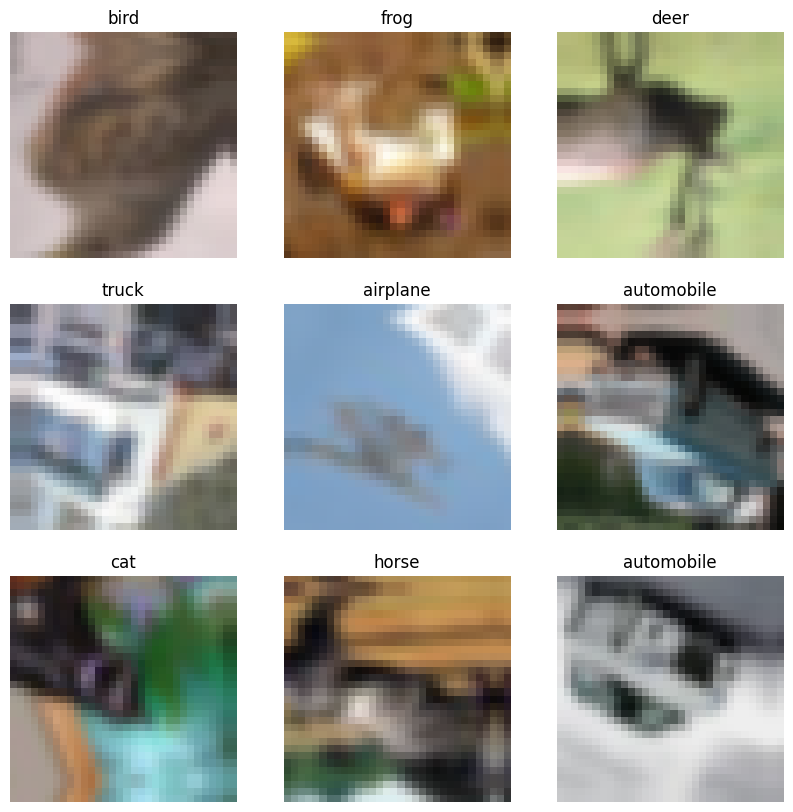

In [ ]:
import matplotlib.pyplot as plt
import cv2

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

def show_images(train_ds, toRGB=None):
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      if toRGB is not None:
        image = cv2.cvtColor(images[i].numpy().astype("uint8"), cv2.COLOR_BGR2RGB)
        plt.imshow(image)
      else:
        plt.imshow(images[i].numpy().astype("uint8"))
      label_idx = labels[i].numpy().squeeze()
      print(type(labels), label_idx)
      plt.title(class_names[label_idx])
      plt.axis("off")

show_images(train_dataset)

In [ ]:
# Load some data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
input_shape = x_train.shape[1:]
classes = 10

x_train = x_train.astype('float32')      # (50000, 32, 32, 3)
x_test = x_test.astype('float32')        # (10000, 32, 32, 3)

# one-hot encoding 
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)

# preprocessing, 'caffe', x_train, x_test: BGR
#x_train = preprocess_input(x_train)
#x_test = preprocess_input(x_test)

batch_size = 128

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
#        layers.RandomFlip("vertical"),     
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ]
)

# Create a tf.data pipeline of augmented images (and their labels)
def create_dataset(ds, batch_size, aug_fn=None, pp_fn=None):
  #dataset = tf.data.Dataset.from_tensor_slices((x, y))
  dataset = ds\
          .shuffle(buffer_size=batch_size*10)\
          .batch(batch_size)
  if aug_fn is not None:
    dataset = dataset.map(lambda x, y: (aug_fn(x), y))
  if pp_fn is not None:
    dataset = dataset.map(lambda x, y: (pp_fn(x), y))
  dataset = dataset.prefetch(tf.data.AUTOTUNE)
  return dataset

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds_origin, val_ds = tf.keras.utils.split_dataset(dataset, left_size=0.7)
train_ds = create_dataset(train_ds_origin, batch_size, None, preprocess_input)

splitted_train_ds = create_dataset(train_ds_origin, batch_size, data_augmentation, preprocess_input)
val_ds = create_dataset(val_ds, batch_size, None, preprocess_input)

<class 'tensorflow.python.framework.ops.EagerTensor'> 4
<class 'tensorflow.python.framework.ops.EagerTensor'> 2
<class 'tensorflow.python.framework.ops.EagerTensor'> 0
<class 'tensorflow.python.framework.ops.EagerTensor'> 0
<class 'tensorflow.python.framework.ops.EagerTensor'> 9
<class 'tensorflow.python.framework.ops.EagerTensor'> 6
<class 'tensorflow.python.framework.ops.EagerTensor'> 9
<class 'tensorflow.python.framework.ops.EagerTensor'> 9
<class 'tensorflow.python.framework.ops.EagerTensor'> 2


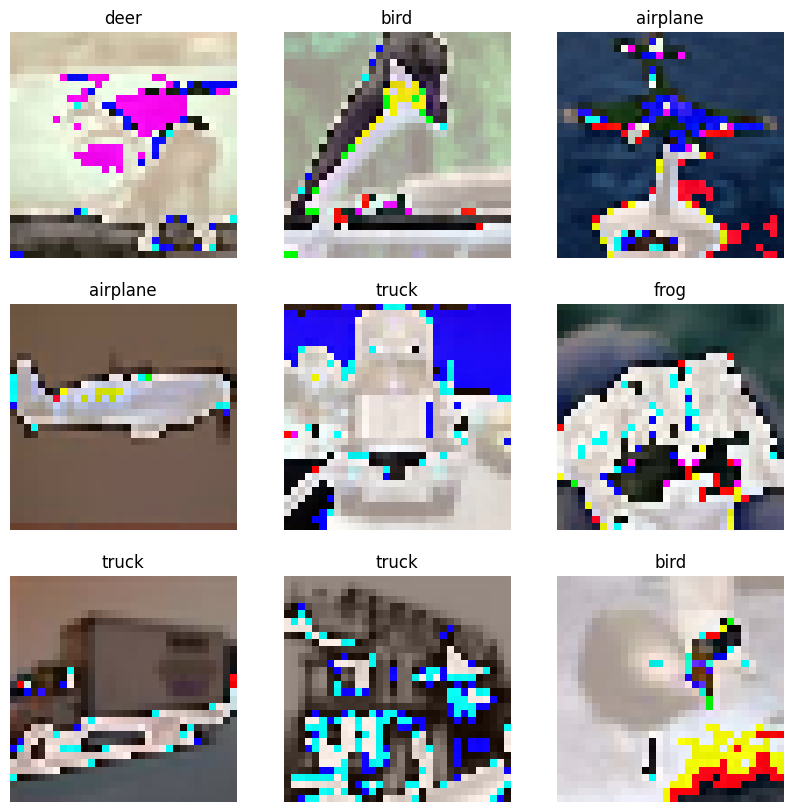

In [ ]:
show_images(train_ds)

<class 'tensorflow.python.framework.ops.EagerTensor'> 5
<class 'tensorflow.python.framework.ops.EagerTensor'> 7
<class 'tensorflow.python.framework.ops.EagerTensor'> 3
<class 'tensorflow.python.framework.ops.EagerTensor'> 6
<class 'tensorflow.python.framework.ops.EagerTensor'> 0
<class 'tensorflow.python.framework.ops.EagerTensor'> 0
<class 'tensorflow.python.framework.ops.EagerTensor'> 8
<class 'tensorflow.python.framework.ops.EagerTensor'> 3
<class 'tensorflow.python.framework.ops.EagerTensor'> 2


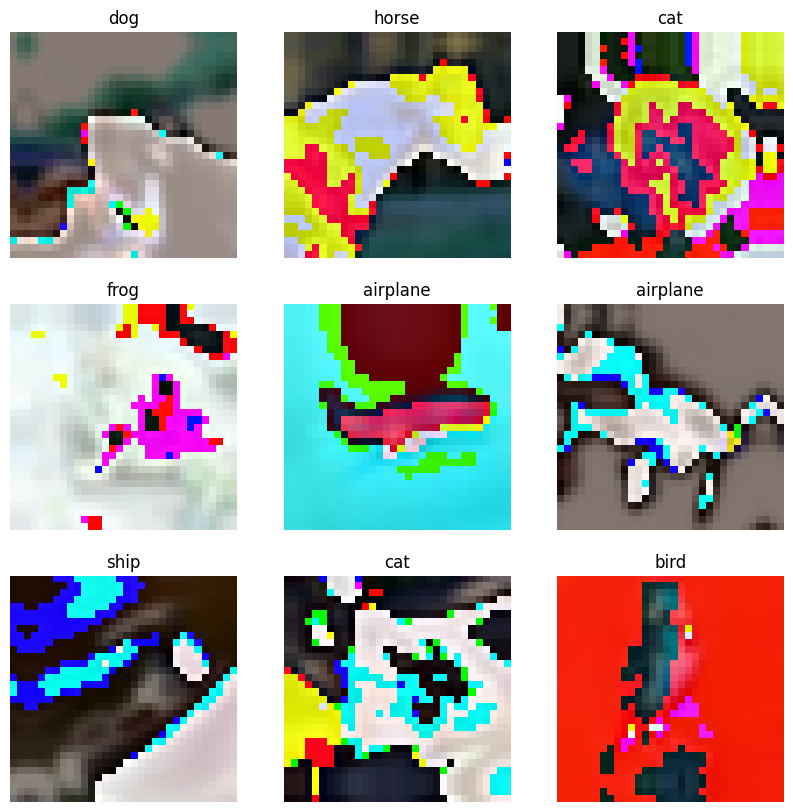

In [ ]:
show_images(splitted_train_ds)

<class 'tensorflow.python.framework.ops.EagerTensor'> 1
<class 'tensorflow.python.framework.ops.EagerTensor'> 7
<class 'tensorflow.python.framework.ops.EagerTensor'> 2
<class 'tensorflow.python.framework.ops.EagerTensor'> 9
<class 'tensorflow.python.framework.ops.EagerTensor'> 3
<class 'tensorflow.python.framework.ops.EagerTensor'> 1
<class 'tensorflow.python.framework.ops.EagerTensor'> 2
<class 'tensorflow.python.framework.ops.EagerTensor'> 9
<class 'tensorflow.python.framework.ops.EagerTensor'> 0


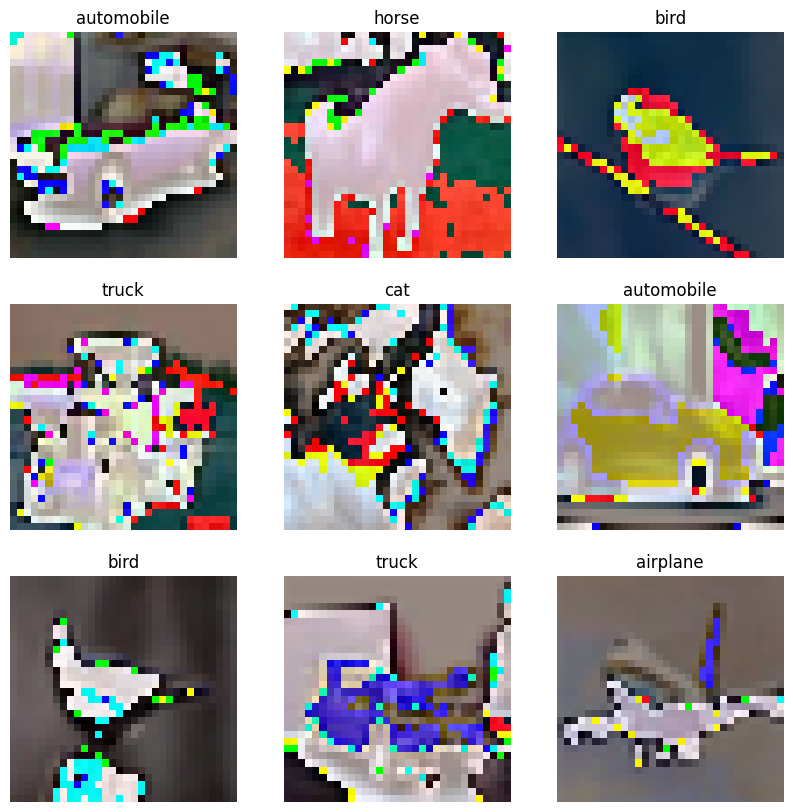

In [ ]:
show_images(val_ds)

In [ ]:
print('splitted_train_ds.element_spec', splitted_train_ds.element_spec) # (None, 32, 32, 3)
print('splitted_train_ds.cardinality', splitted_train_ds.cardinality().numpy()) # 274×128 = 35072

splitted_train_ds.element_spec (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))
splitted_train_ds.cardinality 274


In [ ]:
# train_ds_size = train_ds.cardinality().numpy()
# train_size = int(train_ds_size*(0.7))
# val_size = train_ds_size - train_size
# splitted_train_ds = train_ds.take(train_size)    
# val_ds = train_ds.skip(train_size).take(val_size)

In [ ]:
#274×128 = 35072
# print(f'train_ds_size: {train_ds_size}, train_size: {train_size}, val_size: {val_size}')

In [ ]:
# Create a model and train it on the augmented image data
height = 224
width = 224
inputs = keras.Input(shape=input_shape)
x = tf.keras.layers.Resizing(height, width)(inputs)
#x = layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs
res_model = ResNet50(weights = 'imagenet', include_top = False, input_tensor = x)
res_model.trainable=False

x = res_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation = 'relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(rate=.3)(x)
x = Dense(128, activation = 'relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(rate=.3)(x)
outs  = Dense(10, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs=outs)
model.summary()
#model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
#model.fit(train_dataset, steps_per_epoch=5)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 resizing_3 (Resizing)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['resizing_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                           

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ret = model.fit(train_ds, epochs = 1, validation_data=val_ds, verbose = 2) #, callbacks = [cp_callback])

# 274/274 - 111s - loss: 1.0273 - accuracy: 0.6447 - val_loss: 0.6004 - val_accuracy: 0.7961 - 111s/epoch - 407ms/step
# 274/274 - 78s - loss: 0.4900 - accuracy: 0.8353 - val_loss: 0.3435 - val_accuracy: 0.8805 - 78s/epoch - 284ms/step

274/274 - 78s - loss: 0.5384 - accuracy: 0.8262 - val_loss: 0.4638 - val_accuracy: 0.8444 - 78s/epoch - 286ms/step


In [ ]:
ret2 = model.fit(splitted_train_ds, epochs = 1, validation_data=val_ds, verbose = 2) #, callbacks = [cp_callback])

274/274 - 107s - loss: 0.8059 - accuracy: 0.7177 - val_loss: 0.5854 - val_accuracy: 0.8064 - 107s/epoch - 392ms/step


In [ ]:
test_ds = create_dataset(x_test, y_test, batch_size, None, preprocess_input)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_label[0]

8

In [ ]:
tf.math.confusion_matrix(y_train[:10], y_label[:10])

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0]], dtype=int32)>

In [ ]:
for x, y in train_ds.take(1):
  y_pred = model.predict(x)
  y_label = np.argmax(y_pred, axis = 1)
  C = tf.math.confusion_matrix(y, y_label)
  print("confusion_matrix(C):", C)

4/4 [==============================] - 1s 54ms/step
confusion_matrix(C): tf.Tensor(
[[19  0  1  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  3]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0 13  1  2  1  0  0  1]
 [ 0  0  0  0  2  0  1  0  0  0]
 [ 0  0  0  1  0 11  0  0  0  0]
 [ 0  0  1  2  0  0  8  1  0  0]
 [ 0  0  0  0  1  0  1 14  0  1]
 [ 0  1  0  0  0  0  0  0 10  0]
 [ 0  1  0  0  0  0  0  0  0 15]], shape=(10, 10), dtype=int32)


391/391 - 117s - loss: 0.5228 - accuracy: 0.8141 - 117s/epoch - 300ms/step
79/79 - 16s - loss: 4.4201 - accuracy: 0.2201 - 16s/epoch - 200ms/step


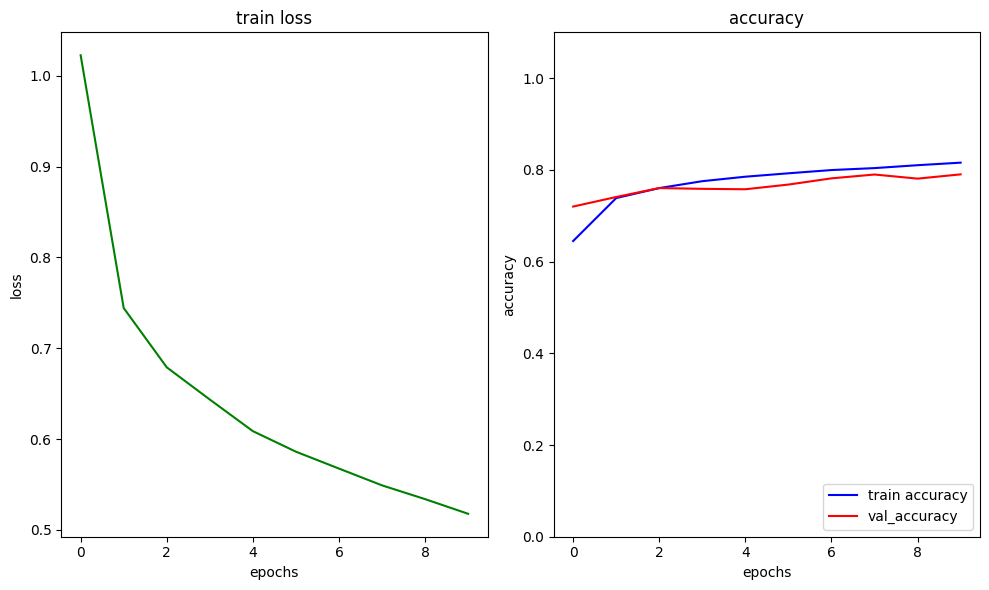

In [ ]:
train_loss, train_acc = model.evaluate(train_ds, verbose = 2)
test_loss, test_acc = model.evaluate(test_ds, verbose = 2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].plot(ret.history['loss'], "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].set_ylim(0, 1.1)
ax[1].plot(ret.history['accuracy'], "b-", label = "train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label = "val_accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc = 'lower right')
fig.tight_layout()
plt.show()

# Step 51 - Upsampling


비전에서 사용하는 두 가지 종류의 업샘플링 방법이 있음

* Non-Learnable interpolation methods : nearest neighbor, bi-linear, bi-cubic 등)

* Learnable neural network methods : transposed convolution, fractionally-stride convolution

<설명>

* CNN에서 Pooling Layer 연산 (예, 이미지 크기를 반씩 줄임)의 역연산(두 배로 키움)이 필요





## UpSampling2D Layer

* 업샘플링 레이어는 가중치가 없는 단순한 레이어

* 입력 크기를 두 배로 늘려 보자!

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 56, 56, 1)        0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 30ms/step
img.shape= (8, 56, 56)


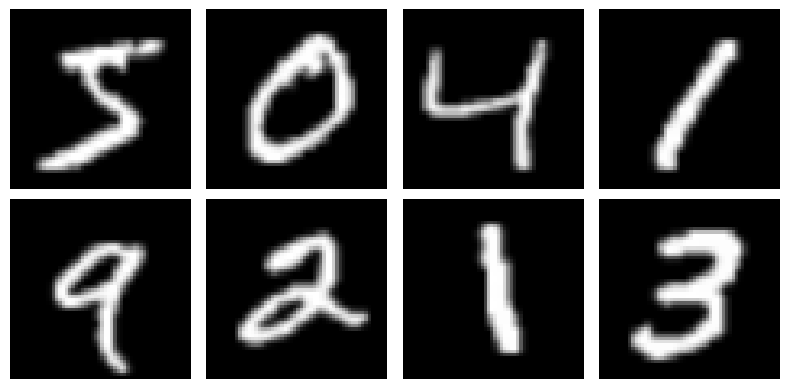

origin_img.shape= (8, 28, 28)


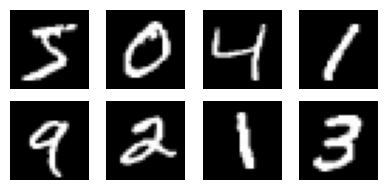

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train_origin, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_origin = x_train_origin.astype('float32')
x_test  = x_test.astype('float32')

# expand data with channel = 1
x_train = np.expand_dims(x_train_origin,axis = 3)      # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis = 3)      # (10000, 28, 28, 1)
 
#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape = (28, 28, 1)
model.add(tf.keras.layers.UpSampling2D(interpolation='bilinear')) # size =(2,2) 
model.summary()

#4: apply x_train to model
output = model.predict(x_train[:8])  # (8, 56, 56, 1)
img = output[:,:,:,0]                # 0-channel                  
print("img.shape=", img.shape)

#5: display images
fig = plt.figure(figsize = (8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap = 'gray')
    plt.axis("off")
fig.tight_layout()
plt.show()

origin_img = x_train_origin[:8]
print("origin_img.shape=", origin_img.shape)

fig = plt.figure(figsize = (4, 2))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(origin_img[i], cmap = 'gray')
    plt.axis("off")
fig.tight_layout()
plt.show()


## tf.image.resize()

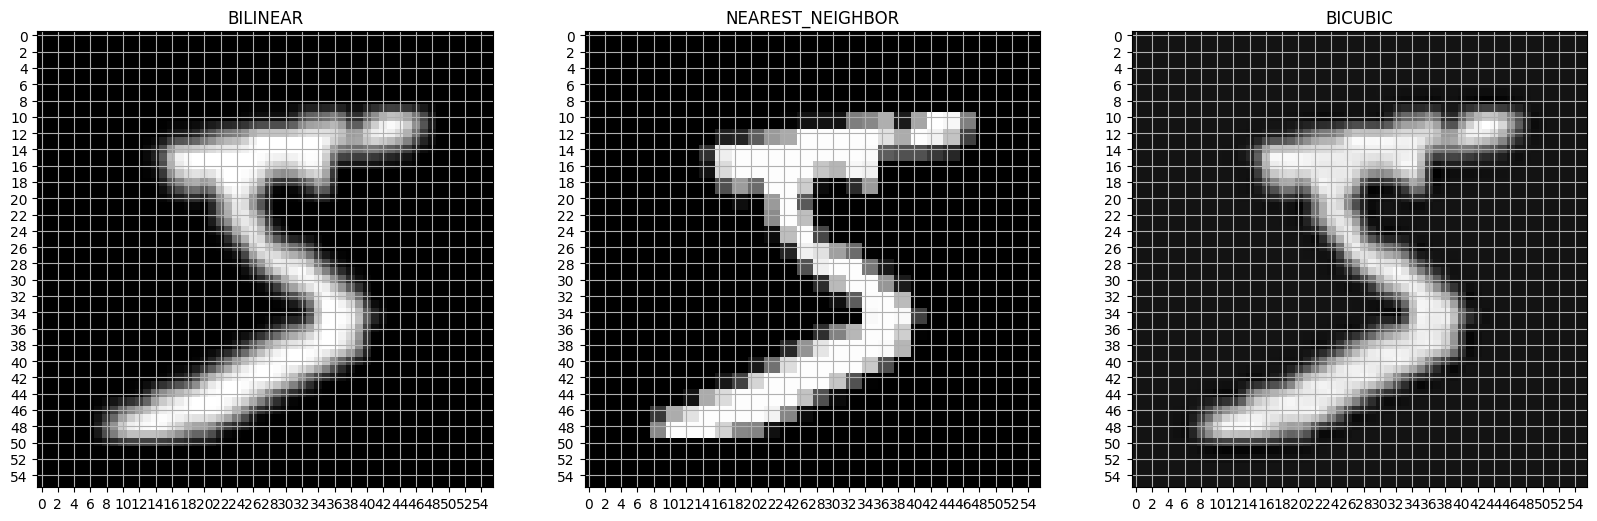

In [ ]:
def upsampling(scale, method):
  n = 28*scale
  img = tf.image.resize(x_train[0], [n, n], method=method, antialias=True)
  return tf.reshape(img, shape=(n, n))

image_bi = upsampling(2, tf.image.ResizeMethod.BILINEAR)
image_near = upsampling(2, tf.image.ResizeMethod.NEAREST_NEIGHBOR)
image_cu = upsampling(2, tf.image.ResizeMethod.BICUBIC)
upsampled_images = np.stack([image_bi, image_near, image_cu])

titles = ['BILINEAR', 'NEAREST_NEIGHBOR', 'BICUBIC']
fig, axes = plt.subplots(1, len(titles), figsize=(20, 60))

for idx in range(len(titles)):
  axes[idx].imshow(upsampled_images[idx,...], cmap='gray')
  ticks = range(0,56,2)
  axes[idx].set_title(titles[idx])
  axes[idx].set_xticks(ticks)
  axes[idx].set_yticks(ticks)
  axes[idx].grid(which='both')

## Step 52 - Conv2DTranspose

<img src="https://miro.medium.com/max/1400/1*kOThnLR8Fge_AJcHrkR3dg.gif" width=400 />


<convolution 연산의 특징> -> convolutional matrix

* positional connectivity 

* many-to-one relationship

--> 반대 연산을 만들 때 두 가지를 고려해야 함!


<img src="https://www.researchgate.net/publication/336144594/figure/fig2/AS:808881324322820@1569863744938/An-example-of-the-deconvolution-process-using-transpose-convolution-In-the-figure.png" width=400 />

<Transposed Convolution>

1. convolution 연산은 convolution matrix 를 이용해서 계산 가능

2. convolution matrix의 shape이 (n x m) 이면, transposed convolution matrix 는 (m x n) 

3. 4 x 4 이미지에 3 x 3 커널을 적용하면 2 x 2 출력이 나오며, 이때 convolution matrix는 4 x 16 이지만, 학습이 필요한 weights 는 9개 (커널)

4. 그러므로 transposed matrix 는 9 개의 weights 만으로 사용하자!

5. transposed matrix의 weights 값은 학습으로 찾음


<기술요소>

* backwards convolution operation

* Transposed convolution layer

* 더 정교한 방식의 업샘플링

In [ ]:
# tf.keras.layers.Conv2DTranspose
# Transposed convolution layer

# tf.keras.layers.Conv2DTranspose(
#     filters,
#     kernel_size,
#     strides=(1, 1),
#     padding='valid',
#     output_padding=None,
#     data_format=None,
#     dilation_rate=(1, 1),
#     activation=None,
#     use_bias=True,
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros',
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs
# )

* 2배로 이미지를 키울 때: padding='same', strides=(2, 2)

In [ ]:
import tensorflow as tf
import numpy as np

#1: 
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)

#2: crate a 2D input data
A = np.array([[1, 2],
              [3, 4 ]],dtype='float32')
A = A.reshape(-1, 2, 2, 1)
print("A.shape=", A.shape)
print("A[0,:,:,0]=\n", A[0,:,:,0])
#3: kernel
W = np.array([[ 1,  -1],      
               [ 2,  -2]], dtype = 'float32')
W = W.reshape(2, 2, 1, 1)   # (kernel_size[0], kernel_size[1], filters, channels)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(A.shape[1:])) # shape = (2, 2, 1)
model.add(tf.keras.layers.Conv2DTranspose(filters=1,
                                 kernel_size = (2, 2),
                                 #strides = (1, 1),
                                 padding='same', strides=(2, 2),
                                 use_bias = False,
                                 kernel_initializer = tf.constant_initializer(W)))
model.summary()
##model.set_weights([W]) # kernel_initializer = tf.constant_initializer(W)

#5: apply A to model
B = model.predict(A)     # (batch, new_rows, new_cols, filters)
print("B.shape=", B.shape)
print("B[0,:,:,0]=\n", B[0,:,:,0])

#6: weights
##W1 = model.get_weights() # W, model.trainable_variables
##print("W1[0].shape=", W1[0].shape)
##print("W1[0]=\n", W1[0])

A.shape= (1, 2, 2, 1)
A[0,:,:,0]=
 [[1. 2.]
 [3. 4.]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_1 (Conv2DT  (None, 4, 4, 1)          4         
 ranspose)                                                       
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 30ms/step
B.shape= (1, 4, 4, 1)
B[0,:,:,0]=
 [[ 1. -1.  2. -2.]
 [ 2. -2.  4. -4.]
 [ 3. -3.  4. -4.]
 [ 6. -6.  8. -8.]]


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_4 (Conv2DT  (None, 56, 56, 1)        9         
 ranspose)                                                       
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 37ms/step
img.shape= (8, 56, 56)


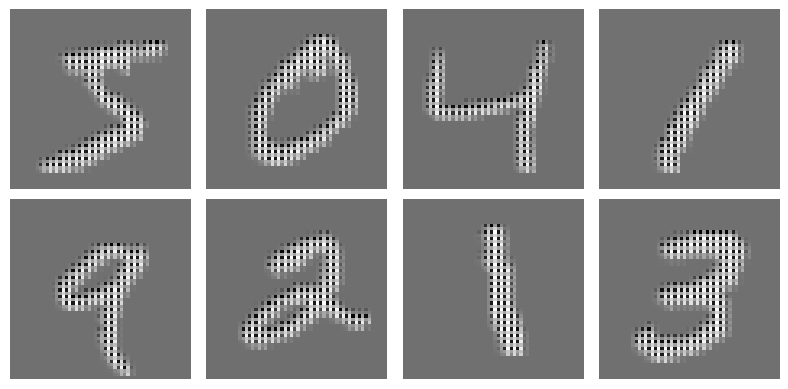

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis = 3)      # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis = 3)      # (10000, 28, 28, 1)

#3: kernel
# W = np.array([[ 1,  1],      
#               [ 1,  1]], dtype = 'float32')
# W = W.reshape(2, 2, 1, 1)   # (kernel_size[0], kernel_size[1], filters, channels)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape = (28, 28, 1)
model.add(tf.keras.layers.Conv2DTranspose(filters=1,
                                 kernel_size = (3, 3),
                                 strides = (2, 2),
                                 padding = 'same',
                                 use_bias = False,                                                          
                                 #kernel_initializer = tf.constant_initializer(W))
                                )
          )
model.summary()

#5: apply x_train to model
output = model.predict(x_train[:8])  # (8, 56, 56, 1)
img = output[:,:,:,0]                # 0-filters                  
print("img.shape=", img.shape)

#6: display images
fig = plt.figure(figsize = (8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap = 'gray')
    plt.axis("off")
fig.tight_layout()
plt.show()